In [2]:
!pip install nltk spacy scikit-learn pandas wordcloud seaborn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import spacy
from spacy.matcher import Matcher

import nltk, sklearn, pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

# nuage de mots
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pascal.Ke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pascal.Ke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pascal.Ke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pascal.Ke\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Pascal.Ke\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Pascal.Ke\AppData\Roaming\nltk_data...
[nltk_data]   Pack

True

# Téléchargement du modèle en anglais

In [4]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 653.6 kB/s eta 0:00:20
     -- ------------------------------------- 0.8/12.8 MB 8.8 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 25.3 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 49.3 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.8 MB 93.9 MB/s eta 0:00:01
     --------------------------------------  12.5/12.8 MB 59.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 54.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Chargement du modèle en Anglais

In [5]:
# Charger le modèle de langue en anglais de Spacy
nlp = spacy.load("en_core_web_sm")

# Processus de filtrage des mots

In [6]:
matcher = Matcher(nlp.vocab)

# Liste de stopwords personnalisée incluant les expressions composées
custom_stopwords = set(spacy.lang.en.stop_words.STOP_WORDS)
custom_stopwords.update(["today", "I", "I'm", "it's", "there's", "I've", "I'd", "I'll", "I'd", "I'd've", "I'll", "I'll've, I'm", "I'm'a", "I'm'o", "I'm'a'no", "I'm'o'no", "I've", "I've'a", "I've'o", "I've'a'no", "I've'o'no", "I'd", "I'd'a", "I'd'o", "I'd'a'no", "I'd'o'no", "I'll", "I'll'a", "I'll'o", "I'll'a'no", "I'll'o'no", "I'm", "I'm'a", "I'm'o", "I'm'a'no", "I'm'o'no"])

# Liste de patterns pour matcher les salutations
greeting_patterns = [
    [{"LOWER": "hello"}],
    [{"LOWER": "hi"}],
    [{"LOWER": "hey"}],
    [{"LOWER": "whatsup"}],
    [{"LOWER": "good"}, {"LOWER": "morning"}],
    [{"LOWER": "good"}, {"LOWER": "afternoon"}],
    [{"LOWER": "good"}, {"LOWER": "evening"}],
    [{"LOWER": "greetings"}]
]

matcher.add("GREETING", greeting_patterns)

global_stopwords = set(stopwords.words('english'))
global_stopwords.update(custom_stopwords)

# Fonction pour lemmatiser les tokens
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(text)]

In [7]:
# Exemple de texte
text = "Today, I don't feel well, I have a headache and I have a sore throat."

# Traitement du texte avec SpaCy
doc = nlp(text)



# Vérifier les mots non inclus

In [8]:
# Afficher les entités nommées
for entity in doc.ents:
    print(f'Entity: {entity.text}, Label: {entity.label_}')
    
# Afficher les entités nommées nominales
for chunk in doc.noun_chunks:
    print(f'Chunk: {chunk.text}, Root: {chunk.root.text}, Root POS: {chunk.root.pos_}')
    
# Afficher les tokens et leurs POS tags
for token in doc:
    print(f'Token: {token.text}, POS: {token.pos_}, Tag: {token.tag_}')
    
# Afficher les dépendances syntaxiques
for token in doc:
    print(f'Token: {token.text}, Dependency: {token.dep_}, Head text: {token.head.text}, Head POS: {token.head.pos_}')

Entity: Today, Label: DATE
Chunk: I, Root: I, Root POS: PRON
Chunk: I, Root: I, Root POS: PRON
Chunk: a headache, Root: headache, Root POS: NOUN
Chunk: I, Root: I, Root POS: PRON
Chunk: a sore throat, Root: throat, Root POS: NOUN
Token: Today, POS: NOUN, Tag: NN
Token: ,, POS: PUNCT, Tag: ,
Token: I, POS: PRON, Tag: PRP
Token: do, POS: AUX, Tag: VBP
Token: n't, POS: PART, Tag: RB
Token: feel, POS: VERB, Tag: VB
Token: well, POS: ADV, Tag: RB
Token: ,, POS: PUNCT, Tag: ,
Token: I, POS: PRON, Tag: PRP
Token: have, POS: VERB, Tag: VBP
Token: a, POS: DET, Tag: DT
Token: headache, POS: NOUN, Tag: NN
Token: and, POS: CCONJ, Tag: CC
Token: I, POS: PRON, Tag: PRP
Token: have, POS: VERB, Tag: VBP
Token: a, POS: DET, Tag: DT
Token: sore, POS: ADJ, Tag: JJ
Token: throat, POS: NOUN, Tag: NN
Token: ., POS: PUNCT, Tag: .
Token: Today, Dependency: npadvmod, Head text: feel, Head POS: VERB
Token: ,, Dependency: punct, Head text: feel, Head POS: VERB
Token: I, Dependency: nsubj, Head text: feel, Head P

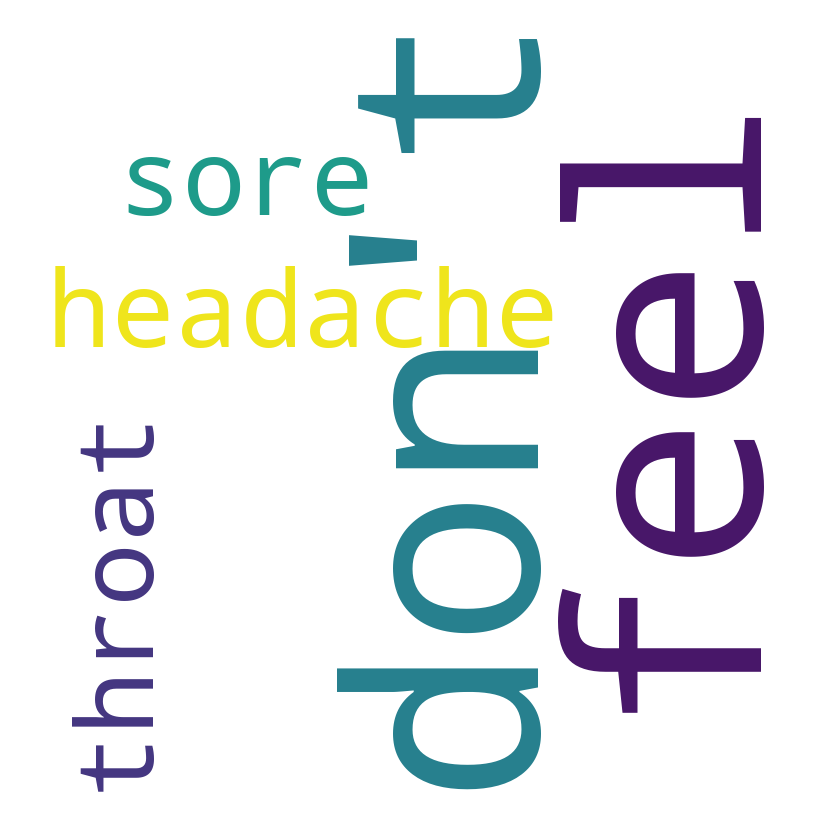

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = custom_stopwords,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Préparation du modèle

In [12]:
import pandas as pd
import os

dataset = pd.read_csv('../data/dataset.csv')
symptom_description = pd.read_csv('../data/symptom_description.csv')
symptom_precaution = pd.read_csv('../data/symptom_precaution.csv')
symptom_severity = pd.read_csv('../data/symptom-severity.csv')

# Afficher les premières lignes de chaque fichier pour exploration
print("Dataset:")
print(dataset.head())

print("\nSymptom Description:")
print(symptom_description.head())

print("\nSymptom Precaution:")
print(symptom_precaution.head())

print("\nSymptom Severity:")
print(symptom_severity.head())

Dataset:
            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Sympto

In [13]:
# Afficher les données manquantes ou nulles
print("Dataset missing values:")
print(dataset.isnull().sum())

Dataset missing values:
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [14]:
# Afficher les doublons
print("Dataset duplicates:")
print(dataset.duplicated().sum())

Dataset duplicates:
4616


In [15]:
# Afficher infos du dataset
print("Dataset info:")
print(dataset.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB
None


In [16]:
dataset.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [17]:
dataset["Disease"].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

C:\Users\Pascal.Ke\AppData\Local\Temp\ipykernel_19188\3922115087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Disease", data=dataset, palette="Spectral")


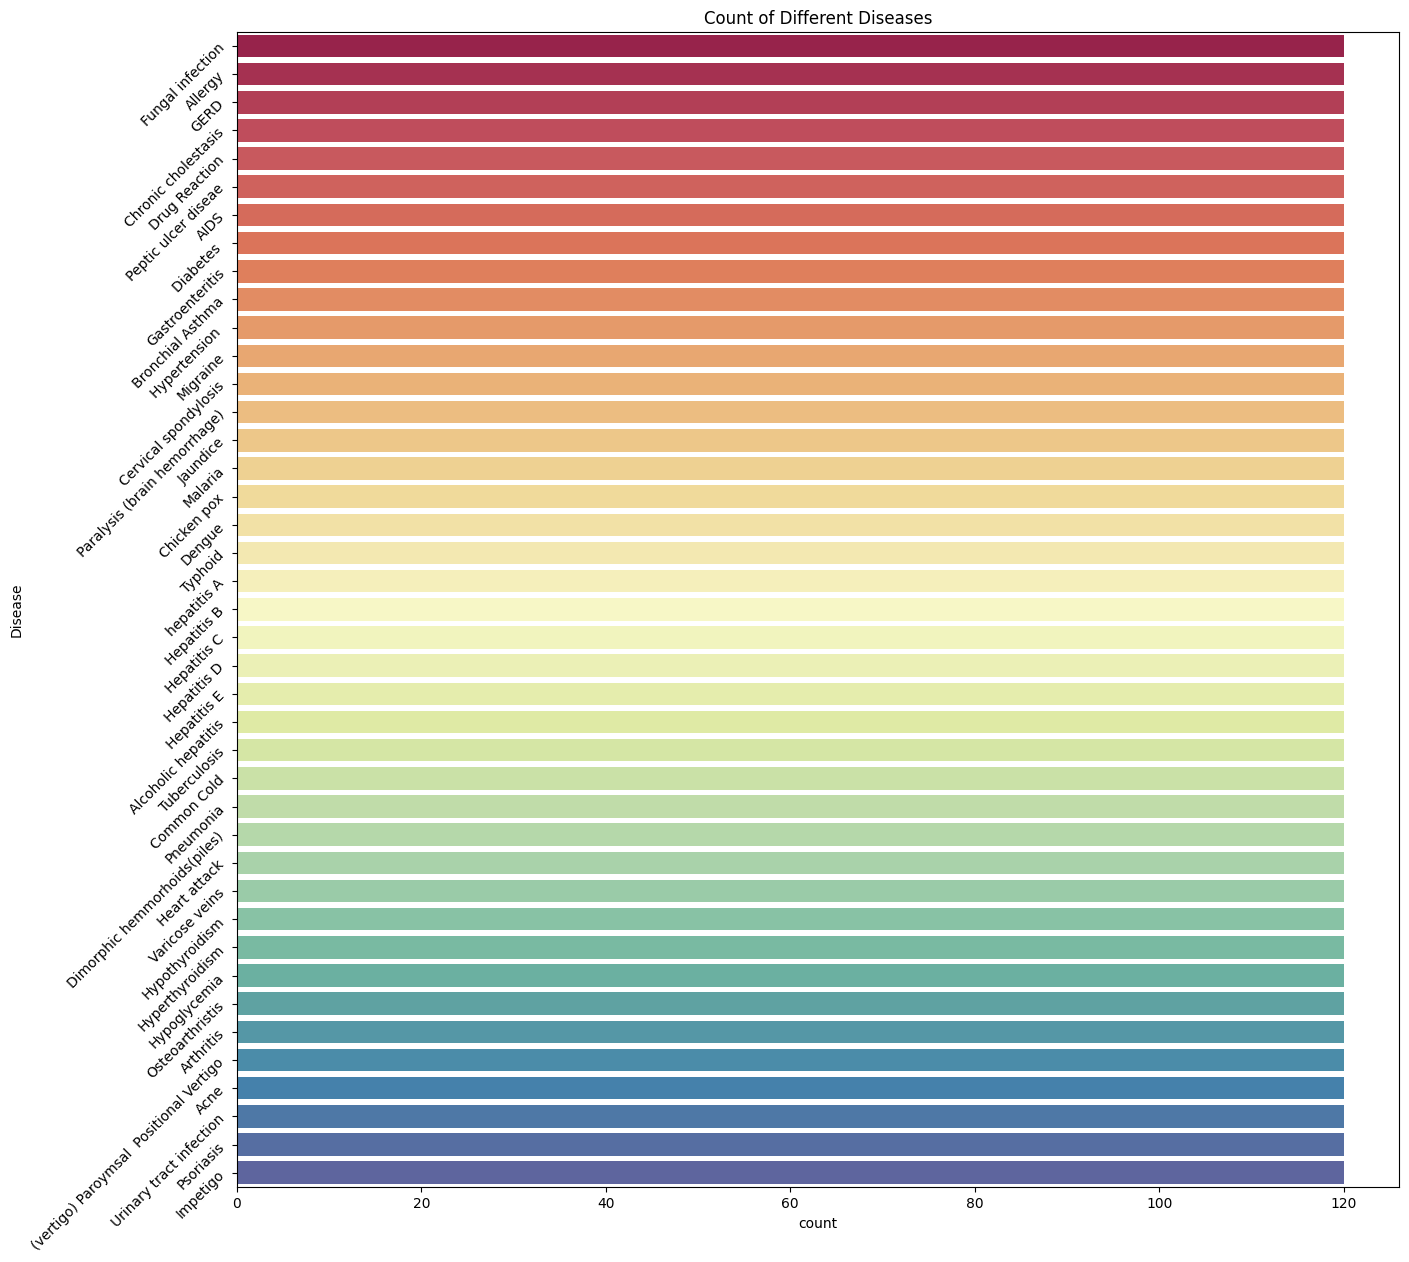

In [18]:
plt.figure(figsize=(15, 15))
sns.countplot(y="Disease", data=dataset, palette="Spectral")
plt.yticks(rotation=45)
plt.title("Count of Different Diseases")
plt.show()

In [19]:
# Fusionner les données du dataset et de la description des symptômes
merged_data = dataset.copy()

# Ajout du champ description des symptômes dans le dataset
merged_data = pd.merge(merged_data, symptom_description, on='Disease', how='left')

# Ajout des précautions des symptômes dans le dataset
merged_data = pd.merge(merged_data, symptom_precaution, on='Disease', how='left')

In [20]:
# Entrainement du modèle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Suppression des lignes contenant des valeurs manquantes
merged_data = merged_data.dropna(subset=['Description', 'Disease'])

# Séparation des données en données d'entrainement et de test
X = merged_data['Description']
y = merged_data['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorisation des données textuelles
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entraînement du modèle
model = SVC()
model.fit(X_train_tfidf, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        21
                                   AIDS       1.00      1.00      1.00        28
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      1.00      1.00        28
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        29
                   Cervical spondylosis       1.00      1.00      1.00        21
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00        27
                            Common Cold       1.00      1.00      1.00        13
                           

In [27]:
# Prédiction d'une nouvelle maladie
new_text = "Hello, i continuously sneeze and i have watery eyes so my eyes are itchy."

# utilisation de lemmatize_text
processed_text = ' '.join(lemmatize_text(new_text))

# retirer les stopwords globaux
processed_text = ' '.join([word for word in processed_text.split() if word not in global_stopwords])

# retirer les stopwords personnalisés
processed_text = ' '.join([word for word in processed_text.split() if word not in custom_stopwords])

# retirer les stopwords de Spacy
doc = nlp(processed_text)
processed_text = ' '.join([token.text for token in doc if not token.is_stop])

# retirer les salutations
matches = matcher(doc)
if matches:
    processed_text = processed_text.replace(doc[matches[0][1]:matches[0][2]].text, '')

# Vectorisation du texte
new_text_tfidf = vectorizer.transform([processed_text])

# Prédiction de la maladie
prediction = model.predict(new_text_tfidf)

In [30]:
# Top 5 des maladies prédites avec les scores
prediction_proba = model.decision_function(new_text_tfidf)
top_5_indices = prediction_proba.argsort()[0][-5:]
top_5_scores = prediction_proba[0][top_5_indices]
top_5_diseases = model.classes_[top_5_indices]

print("Prediction:")
print(f"Top 5 diseases: {top_5_diseases}")
print(f"Top 5 scores: {top_5_scores}")

Prediction:
Top 5 diseases: ['Alcoholic hepatitis' 'Allergy' 'Acne' 'Psoriasis' 'Chicken pox']
Top 5 scores: [32.95279938 32.95307862 34.95234992 35.95254477 37.28664091]


In [25]:
# Afficher l'accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

print('- - - - - - - ')

# Afficher la réponse avec une forme de salutation suivi de la prédiction puis de la description et des précautions
predicted_disease = prediction[0]
description = merged_data[merged_data["Disease"] == predicted_disease]["Description"].values[0]

print(f'Hello! It appears that you might have {predicted_disease}.')
print(f'Description: {description}')

print('Here are some precautions you should take:')
# Boucler pour afficher toutes les précautions de la maladie
precautions = [merged_data[merged_data["Disease"] == predicted_disease][f'Precaution_{i+1}'].values[0] for i in range(4)]
for i, precaution in enumerate(precautions, 1):
    print(f'-{i}): {precaution}')

Accuracy: 1.0
- - - - - - - 
Hello! It appears that you might have Common Cold.
Description: The common cold is a viral infection of your nose and throat (upper respiratory tract). It's usually harmless, although it might not feel that way. Many types of viruses can cause a common cold.
Here are some precautions you should take:
-1): drink vitamin c rich drinks
-2): take vapour
-3): avoid cold food
-4): keep fever in check


# Les mots clés dans la phrase pour trouver la maladie

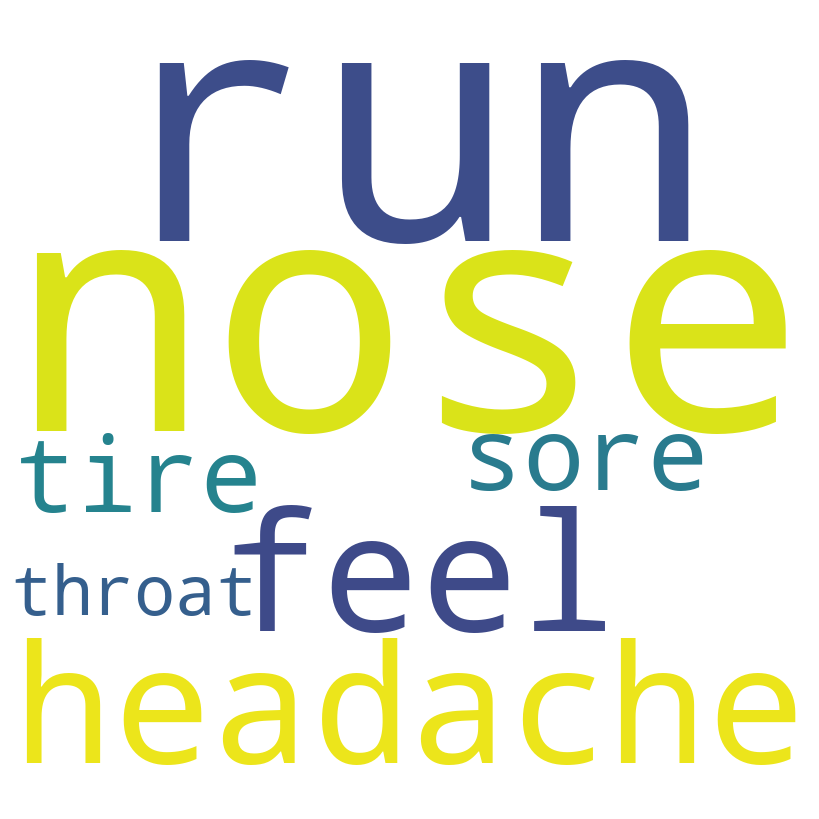

In [23]:
# nuage de mots
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = custom_stopwords,
                min_font_size = 10).generate(processed_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()